In [2]:
from pynwb import NWBHDF5IO; # to read/write
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
from scipy import stats;
from tqdm import tqdm;

In [3]:
data_dir = 'E:\\File\\Work\\2024\\Practice_recording_data\\'
nwb_filename = data_dir + 'Link_V4-PFC_cooling.nwb'
with NWBHDF5IO(nwb_filename, 'r') as io:
   nwbfile = io.read();
   units = nwbfile.units.to_dataframe();
   trials = nwbfile.trials.to_dataframe();

In [6]:
from cal_FR import *
temp = units.iloc[0]
temp

session                                               session_00
sess_name                                                l220428
hemisphere                                                    LH
probe                                                     probe0
unitID                                                        14
location                                                      V4
depth                                                       1220
avgWF          [-15.242637362637362, -15.315824175824176, -15...
normWF         [0.0031234957642238986, 0.0031234957642238986,...
spike_times    [18.179833333333335, 25.1715, 25.1737, 32.4072...
spkMtx         [[False, False, False, False, False, False, Fa...
Name: 0, dtype: object

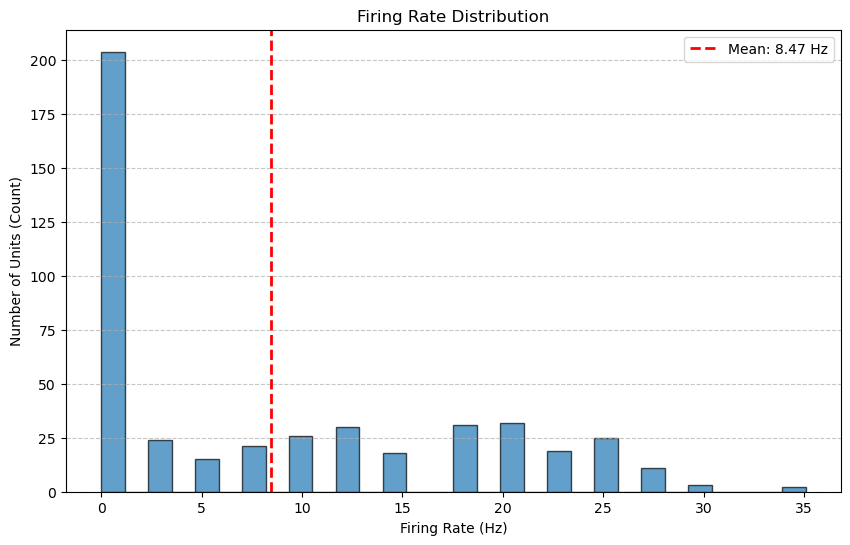

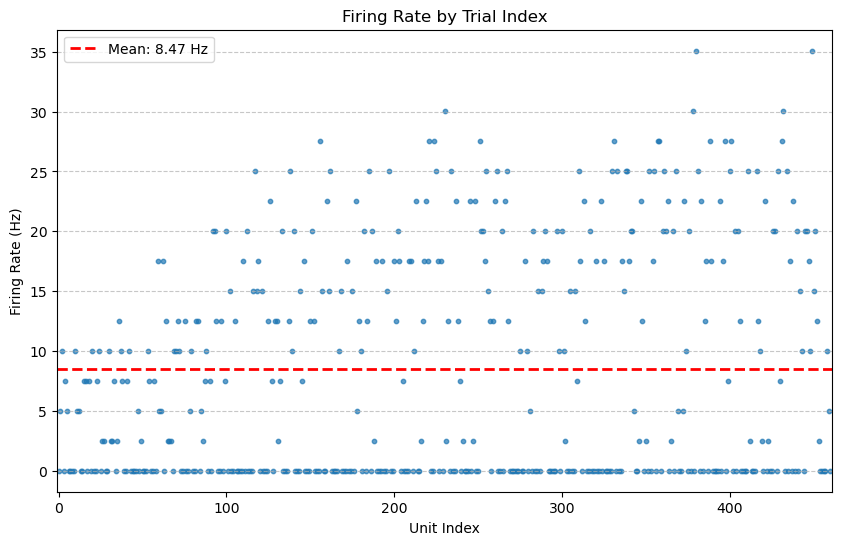

In [104]:
#check session 00, region V4, time 0-400ms, 
units_target = units[units['session']=='session_00']
units_target = units_target[units_target['location']=='V4']
target_spkMtx = units_target['spkMtx'] #this is a (n,) array, n=unit number, usually 10 - 80. 
target_spkMtx = target_spkMtx[0]
target_spkMtx_fr = []
for each_row in target_spkMtx:
    fr = cal_FR(data = each_row,
                start_time = 999,
                end_time = 1398,
                )
    target_spkMtx_fr.append(fr)
plot_firing_rate_distribution(target_spkMtx_fr)
plot_firing_rate_by_index(target_spkMtx_fr)
fr_all = target_spkMtx_fr

In [8]:
temp = trials.iloc[0]
temp

start_time                                                   -1.0
stop_time                                                     1.0
session                                                session_00
sess_name                                                 l220428
hemisphere                                                     LH
trialNum                                                        1
ref_stimID                                                     31
test_stimID                                                    31
pdOnTS_V4                  [17.01606973308833, 17.64115783074282]
pdOffTS_V4               [17.414674896787503, 18.148084397683075]
pdOnTS_PFC               [17.034974966131948, 17.660066265327984]
pdOffTS_PFC              [17.433582171384938, 18.166995428616605]
eyeH            [-12251, -12249, -12264, -12229, -12239, -1226...
eyeV            [-13998, -14013, -14018, -14005, -14016, -1401...
correct                                                         1
pypeRT    

In [11]:
#Now from this unit I want to see whether successful trials have higher fr. 
target_trials = trials[trials['session']=='session_00']
target_trials.shape
#target_correct = target_trials['correct']
#target_correct.shape


(461, 19)

In [9]:
num_sessions = 27
session_name_list = [f"session_{i:02d}" for i in range(num_sessions)]
session_name_list

['session_00',
 'session_01',
 'session_02',
 'session_03',
 'session_04',
 'session_05',
 'session_06',
 'session_07',
 'session_08',
 'session_09',
 'session_10',
 'session_11',
 'session_12',
 'session_13',
 'session_14',
 'session_15',
 'session_16',
 'session_17',
 'session_18',
 'session_19',
 'session_20',
 'session_21',
 'session_22',
 'session_23',
 'session_24',
 'session_25',
 'session_26']

In [94]:
from Data_cleaner import *
units_new,trials_new,num_of_correct,num_of_total_trials = get_correct_df(units,trials)

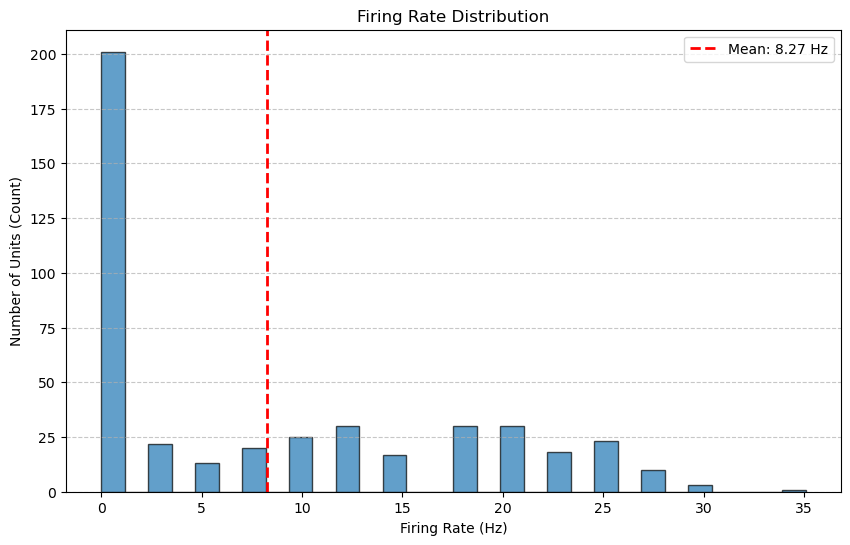

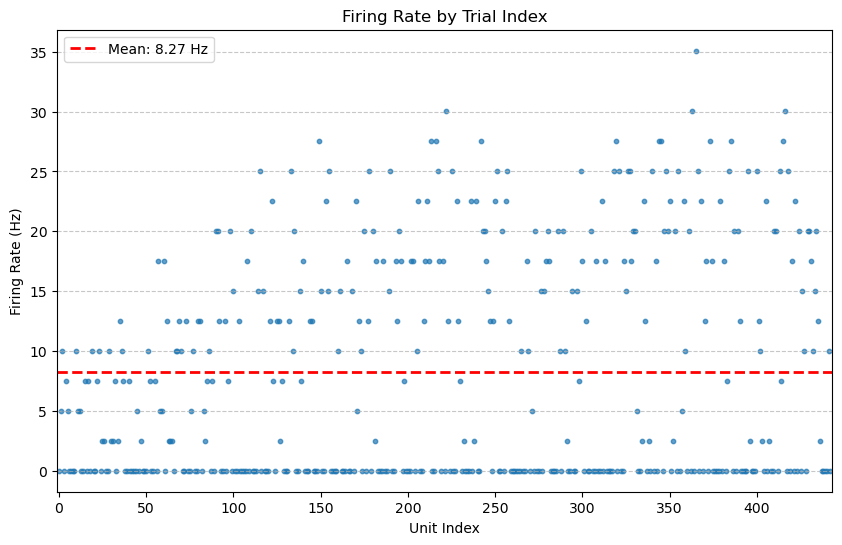

In [105]:
#check session 00, region V4, time 0-400ms, 
units_target = units_new[units_new['session']=='session_00']
units_target = units_target[units_target['location']=='V4']
target_spkMtx = units_target['spkMtx'] #this is a (n,) array, n=unit number, usually 10 - 80. 
target_spkMtx = target_spkMtx[0]
target_spkMtx_fr = []
for each_row in target_spkMtx:
    fr = cal_FR(data = each_row,
                start_time = 999,
                end_time = 1398,
                )
    target_spkMtx_fr.append(fr)
plot_firing_rate_distribution(target_spkMtx_fr)
plot_firing_rate_by_index(target_spkMtx_fr)
fr_correct = target_spkMtx_fr

In [1]:
#Is it true there the fr are more likely to be >0 when the tasks are correct: 
fr_all = np.array(fr_all)
fr_correct = np.array(fr_correct)
not_zero_all = (fr_all != 0)
not_zero_correct = (fr_correct != 0)
fire_ratio_all = np.mean(not_zero_all)
fire_ratio_correct = np.mean(not_zero_correct)
print(fire_ratio_all)
print(fire_ratio_correct)

NameError: name 'np' is not defined

In [111]:
a = [0.0, 1.5, 0.0, 3.2, 0.0, 5.0, 0.0, 10.0]
a_np = np.array(a)
a_np

array([ 0. ,  1.5,  0. ,  3.2,  0. ,  5. ,  0. , 10. ])